# Building a content-based recommender system for scientific papers

# 1. Introduction

This project is aimed to develop a content-based recommender system for scientific papers using the open source database downloaded from Kaggle (i.e. [arXiv](https://arxiv.org/)). Text wrangling and pre-processing was performed using natural language tool kit (nltk) library in Python. Two recommendation engines were developed. One is built using TF-IDF to convert text into vectors, and another is built using word embeddings. The recommendation engines are able to provide top 5 most similar papers to the paper that a user is reading, although user-based data would be needed to evaluate the performance. With the help of a recommendation engine, we can efficiently extract relevant information from numerous scientific papers automatically, which would be of great public interest, especially in the scientific community. 

## 1.1. Problem identification and impact statement
***
[arXiv](https://arxiv.org/) is an open-access repository of electronic preprints (i.e. e-prints) of scientific papers, which covers various fields including mathematics, physics, astronomy, computer science, quantitative biology, statistics, and quantitative finance. It is a collaboratively funded, community-supported resource that is maintained and operated by [Cornell University](https://arxiv.org/about). Since its establishment by Paul Ginsparhg in 1991, arXiv has served the public and research communities by enabling scientists worldwide to share and access research before it is formally published. As of today, arXiv has hosted over 1.7 million scholarly articles. With the exponentially increasing numbers of articles, extracting relevant information efficiently becomes a challenge. Fortunately, it is possible to make the exploration of scholarly articles faster and more accurate, with the help of recommender systems. So far, most recommender systems are available for applications in movie, news, music, and product recommendations. In contrast, relatively fewer efforts have addressed recommendation of scientific papers. 

Therefore, the Goal of this project is **to develop a recommender system that can present the users with related articles based on the  article they are reading**

> <img align='center' width='200' height='150' src="arXiv.jpeg">

## 1.2. Dataset description

The dataset is downloaded from [Kaggle](https://www.kaggle.com/Cornell-University/arxiv). Below is a description of each of the 10 attributes: 

| No. | Variable name | Description |
| --- | --- | --- | 
| 1 | id | ArXiv ID | 
| 2 | submitter | Who submitted the paper | 
| 3 | authors | Authors of the paper | 
| 4 | title | Title of the paper |
| 5 | comments | Additional info, such as number of pages and figures |
| 6 | journal-ref | Information about the journal the paper was published in |
| 7 | doi |[Digital Object Identifier](https://www.doi.org)|
| 8 | abstract | The abstract of the paper|
| 9 | categories | Categories / tags in the ArXiv system |
| 10 | versions | A version history |


## 1.3. Methdology 
A general workflow is outlined below: 
***
* Text wrangling, and preprocessing
  * Load libraries
  * Load data, select and define columns
  * Data cleaning: deal with missing values, duplicated entries
  * Text preprocessing: 
    * Remove irrelevant characters (e.g. numbers, punctuation)
    * Convert all characters into lowercase
    * Tokenization (the process of converting text into individual words - tokens)
    * Removing Stopwords (words that are too common and do not qualify for being good keywords for search)
    * Lemmatization (converting each word to its lemma word (e.g. ran, running are converted to run) to reduce words of similar roots to similar tokens)
    * Remove the words having length < 2 
    * Convert the list of tokens to string
    * Export the cleaned text   
* Exploratory Data Analysis (EDA)
* Content-Based Recommendation Engine: 
  * TF-IDF:
    * Convert each abstract into vectors using TF-IDF and unigram
    * Calculate similarity between all abstracts using cosine similarity
    * Define a function that takes title as input, and returns the top 5 similar recommended articles based on similarities between abstracts
  * Word Embeddings:
    * Build TF-IDF model and calculate TF-IDF score
    * Build TF-IDF Word2Vec Embeddings
    * Define a function that takes title as input, and returns the top 5 similar articles based on similarities between abstracts   
* Conclusions
* Acknowledgements

# 2. Text wrangling
# 2.1. Load libraries

In [1]:
#load basic libraries
import os
import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
cwd = os.getcwd()
print('The current working directory is %s' %cwd)

The current working directory is /Users/hhl/Desktop/Springboard062020/Springboard/Capstone3


# 2.2. Load data, select and define relavant columns

In [3]:
#specify the file name
filename ='arxiv-metadata-oai-snapshot.json'

In [4]:
#check the total number of articles in the original file
with open(filename, 'r') as f:
    num_lines = sum(1 for line in f)
        
print('Total No. of articles: {}'.format(num_lines))

Total No. of articles: 1767485


In [5]:
#check the first entry
with open(filename, 'r') as f:
    first_record = f.readline()
print (first_record)

{"id":"0704.0001","submitter":"Pavel Nadolsky","authors":"C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan","title":"Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies","comments":"37 pages, 15 figures; published version","journal-ref":"Phys.Rev.D76:013009,2007","doi":"10.1103/PhysRevD.76.013009","report-no":"ANL-HEP-PR-07-12","categories":"hep-ph","license":null,"abstract":"  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predic

In [6]:
#select articles archived since 2015
papers = []
with open(filename, 'r') as f:
    for paper in f:
        paper_dict = json.loads(paper)
        ref = paper_dict['journal-ref']
        try:
            year = int(ref[-4:])
            if 2015 <= year < 2020:
                papers.append({
                      'id':paper_dict['id'],
                      'title':paper_dict['title'],
                      'abstract':paper_dict['abstract'],
                      'category':paper_dict['categories'].split(' '),
                      'doi':paper_dict['doi']})
        except:
            pass

len(papers)

print('No. of articles archieved since year 2015: {}'.format(len(papers)))

No. of articles archieved since year 2015: 18118


In [7]:
#convert to a dataframe
dat = pd.DataFrame(papers)
dat.head()

,id,title,abstract,category,doi
0,0707.1174,Banach-like metrics and metrics of compact sets,We present and study a family of metrics on ...,"[math.MG, math.CA, math.DG, math.GN]",10.1137/140972512
1,0707.4025,On the Cohomological Derivation of Yang-Mills ...,We present a brief review of the cohomologic...,[physics.gen-ph],10.4236/jhepgc.2017.32031
2,0707.4470,Geometric Computational Electrodynamics with V...,"In this paper, we develop a structure-preser...","[math.NA, physics.comp-ph]",10.1007/978-1-4939-2441-7_19
3,0708.0397,A presentation for the mapping class group of ...,Finite presentations for the mapping class g...,"[math.GT, math.GR]",10.1016/j.jpaa.2009.02.009
4,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,"[math.DG, math.AP, math.MG]",10.1007/s00574-017-0056-6


# 2.3. Data cleaning: missings, duplicates etc.

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18118 entries, 0 to 18117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        18118 non-null  object
 1   title     18118 non-null  object
 2   abstract  18118 non-null  object
 3   category  18118 non-null  object
 4   doi       13485 non-null  object
dtypes: object(5)
memory usage: 707.9+ KB


In [9]:
#deal with missings
dat.isnull().sum()

id             0
title          0
abstract       0
category       0
doi         4633
dtype: int64

In [10]:
dat.doi[dat.doi.isnull()]

9        None
11       None
17       None
18       None
19       None
         ... 
18083    None
18100    None
18101    None
18106    None
18109    None
Name: doi, Length: 4633, dtype: object

In [11]:
#remove duplicated entries
dat[dat.id.duplicated()]

,id,title,abstract,category,doi


# 3. Text preprocessing 
   * Remove irrelevant characters (e.g. numbers, punctuation)
   * Convert all characters into lowercase
   * Tokenization (the process of converting text into individual words - tokens)
   * Removing Stopwords (words that are too common and do not qualify for being good keywords for search)
   * Lemmatization (converting each word to its lemma word (e.g. ran, running are converted to run) to reduce words of similar roots to similar tokens)
   * Remove the words having lenth < 2 
   * Convert the list of tokens to string
   * Export the cleaned text 

In [12]:
import re
import string

import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stop_words.remove('no')
stop_words.remove('not')
lemma = WordNetLemmatizer()

#define a function to do above steps, and return clean_abstract
def clean_abstract(text):
    tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words]  #remove Stopwords
    tokens = [lemma.lemmatize(word=w, pos='v') for w in tokens]  #lemmatization
    tokens = [w for w in tokens if len(w) > 2]  #remove words having lenth <= 2
    text = ' '.join(tokens)  #convert the list of tokens into string
    return text

dat['clean_abstract'] = dat['abstract'].apply(func = clean_abstract)

In [13]:
# abstract before pre-processing: abstract
dat['abstract'][0]  

"  We present and study a family of metrics on the space of compact subsets of\n$R^N$ (that we call ``shapes''). These metrics are ``geometric'', that is, they\nare independent of rotation and translation; and these metrics enjoy many\ninteresting properties, as, for example, the existence of minimal geodesics. We\nview our space of shapes as a subset of Banach (or Hilbert) manifolds: so we\ncan define a ``tangent manifold'' to shapes, and (in a very weak form) talk of\na ``Riemannian Geometry'' of shapes. Some of the metrics that we propose are\ntopologically equivalent to the Hausdorff metric; but at the same time, they\nare more ``regular'', since we can hope for a local uniqueness of minimal\ngeodesics.\n  We also study properties of the metrics obtained by isometrically identifying\na generic metric space with a subset of a Banach space to obtain a rigidity\nresult.\n"

In [14]:
# abstract after pre-processing: clean_abstract
dat['clean_abstract'][0]

'present study family metrics space compact subsets call shape metrics geometric independent rotation translation metrics enjoy many interest properties example existence minimal geodesics view space shape subset banach hilbert manifold define tangent manifold shape weak form talk riemannian geometry shape metrics propose topologically equivalent hausdorff metric time regular since hope local uniqueness minimal geodesics also study properties metrics obtain isometrically identify generic metric space subset banach space obtain rigidity result'

In [15]:
#add general category
dat['general_category'] = dat.category.apply(lambda x:[a.split('.')[0] for a in x])

In [16]:
dat.head()

,id,title,abstract,category,doi,clean_abstract,general_category
0,0707.1174,Banach-like metrics and metrics of compact sets,We present and study a family of metrics on ...,"[math.MG, math.CA, math.DG, math.GN]",10.1137/140972512,present study family metrics space compact sub...,"[math, math, math, math]"
1,0707.4025,On the Cohomological Derivation of Yang-Mills ...,We present a brief review of the cohomologic...,[physics.gen-ph],10.4236/jhepgc.2017.32031,present brief review cohomological solutions i...,[physics]
2,0707.4470,Geometric Computational Electrodynamics with V...,"In this paper, we develop a structure-preser...","[math.NA, physics.comp-ph]",10.1007/978-1-4939-2441-7_19,paper develop discretization lagrangian framew...,"[math, physics]"
3,0708.0397,A presentation for the mapping class group of ...,Finite presentations for the mapping class g...,"[math.GT, math.GR]",10.1016/j.jpaa.2009.02.009,finite presentations map class group know arbi...,"[math, math]"
4,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,"[math.DG, math.AP, math.MG]",10.1007/s00574-017-0056-6,work consider question calculus variations mot...,"[math, math, math]"


In [17]:
# export the cleaned data
dat.to_csv('dat_clean.csv',index=False)

# 4. Exploratory Data Analyses (EDA)

In [18]:
dat.head()

,id,title,abstract,category,doi,clean_abstract,general_category
0,0707.1174,Banach-like metrics and metrics of compact sets,We present and study a family of metrics on ...,"[math.MG, math.CA, math.DG, math.GN]",10.1137/140972512,present study family metrics space compact sub...,"[math, math, math, math]"
1,0707.4025,On the Cohomological Derivation of Yang-Mills ...,We present a brief review of the cohomologic...,[physics.gen-ph],10.4236/jhepgc.2017.32031,present brief review cohomological solutions i...,[physics]
2,0707.4470,Geometric Computational Electrodynamics with V...,"In this paper, we develop a structure-preser...","[math.NA, physics.comp-ph]",10.1007/978-1-4939-2441-7_19,paper develop discretization lagrangian framew...,"[math, physics]"
3,0708.0397,A presentation for the mapping class group of ...,Finite presentations for the mapping class g...,"[math.GT, math.GR]",10.1016/j.jpaa.2009.02.009,finite presentations map class group know arbi...,"[math, math]"
4,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,"[math.DG, math.AP, math.MG]",10.1007/s00574-017-0056-6,work consider question calculus variations mot...,"[math, math, math]"


In [19]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18118 entries, 0 to 18117
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                18118 non-null  object
 1   title             18118 non-null  object
 2   abstract          18118 non-null  object
 3   category          18118 non-null  object
 4   doi               13485 non-null  object
 5   clean_abstract    18118 non-null  object
 6   general_category  18118 non-null  object
dtypes: object(7)
memory usage: 991.0+ KB


In [20]:
#what is the range of the count of words in each abstract after cleaning? 
dat['word_count'] = dat['clean_abstract'].apply(lambda x:len(str(x).split()))
dat.word_count.describe()

count    18118.000000
mean        84.477978
std         34.778194
min          3.000000
25%         59.000000
50%         83.000000
75%        109.000000
max        252.000000
Name: word_count, dtype: float64

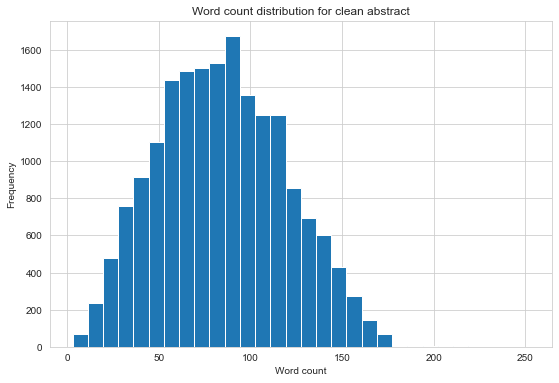

In [21]:
dat['word_count'].plot(kind='hist',bins=30,figsize=(9,6))
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.title('Word count distribution for clean abstract')
plt.show()

# 5. Recommendation engines: 
# 5.1. Recommendation engine using TF-IDF
  * Define a function that takes title as input, and returns the top 5 similar articles 
     * Convert each abstract into vectors using TF-IDF 
     * Calculate similarity between all abstracts using cosine similarity
     * Sort the similarity scores, and select the top 5 most similar articles

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#convert the abstract into vectors and use unigram
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(dat['clean_abstract'])
df1 = pd.DataFrame(tfidf_matrix.todense(),columns=tfidf.get_feature_names())
df1.shape

(18118, 37948)

Text(0.5, 1.0, 'Sparse Matrix Sample')

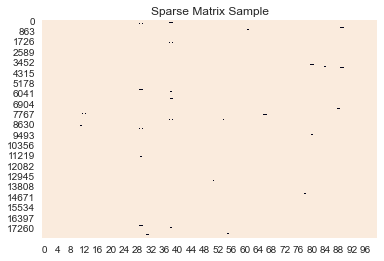

In [23]:
#plot examples of tfidf_matrix
sns.heatmap(tfidf_matrix.todense()
           [:,np.random.randint(0,10000,100)]==0, vmin=0, vmax=1, 
            cbar=False).set_title('Sparse Matrix Sample')

In [36]:
def paper_recommend1(title):
    #calculate cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
    #convert index into series
    indices = pd.Series(dat.index, index=dat['title'])
    #get the index corresponding to the input title
    idx = indices[title]
    #get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_similarities[idx]))
    #sort the articles
    sim_scores = sorted(sim_scores,key=lambda x: x[1],reverse=True)
    #the 5 most similar articles
    sim_scores = sim_scores[1:6]
    #paper indices
    paper_indices = [i[0] for i in sim_scores]
    recomd = dat[['title']].iloc[paper_indices]
    print('\nHere are the top 5 similar articles that may interest you:')
    print('--------------------------\n')
    for n,i in enumerate(sim_scores):
        print('#{}.'.format(n+1), 'Title: “{}”.'.format(dat['title'][i[0]]),'(DOI:{})\n'.format(dat['doi'][i[0]]))

In [39]:
paper_recommend1('Budget Constraints in Prediction Markets')


Here are the top 5 similar articles that may interest you:
--------------------------

#1. Title: “Can information be spread as a virus? Viral Marketing as epidemiological
  model”. (DOI:10.1002/mma.3783)

#2. Title: “Modeling the residential electricity consumption within a restructured
  power market”. (DOI:None)

#3. Title: “Investigating the effect of competitiveness power in estimating the
  average weighted price in electricity market”. (DOI:10.1016/j.tej.2019.106628)

#4. Title: “Markets, herding and response to external information”. (DOI:10.1371/journal.pone.0133287)

#5. Title: “Improving content marketing processes with the approaches by artificial
  intelligence”. (DOI:None)



# 5.2. Content-based recommendation system using word embeddings
TF-IDF convert the raw text into vectors in the above recommendation engine. Howerver it does not capture the semantic meaning, and also it gives a sparse matrix. In contrast, word embeddings create a dense, low dimensional feature whereas TF-IDF create a sparse, high dimensional feature. It also captures the semantic meaning very well. This project explores how TF-IDF Word2Vec can be used to build a reocmmendation engine

In [27]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors

In [28]:
corpus = []
for words in dat['clean_abstract']:
    corpus.append(words.split())

In [29]:
# Downloading the Google pretrained Word2Vec Model
#url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'

#load pretrained model
google_word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# Training our corpus with Google Pretrained Model
google_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

google_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)

google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

(0, 0)

In [30]:
#Building TFIDF model and calculate TFIDF score
tfidf = TfidfVectorizer()
tfidf.fit(dat['clean_abstract'])

# Getting the words from the TF-IDF model
tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names() # tfidf words/col-names

In [31]:
# Building TF-IDF Word2Vec embeddings

tfidf_vectors = []; 
line = 0;
# for each book description
for abstract in corpus: 
  # Word vectors are of zero length (Used 300 dimensions)
    set_vec = np.zeros(300) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the abstract
    for word in abstract: 
        if word in google_model.wv.vocab and word in tfidf_feature:
            vec = google_model.wv[word]
            tf_idf = tfidf_list[word] * (abstract.count(word) / len(abstract))
            set_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        set_vec /= weight_sum
    tfidf_vectors.append(set_vec)
    line += 1

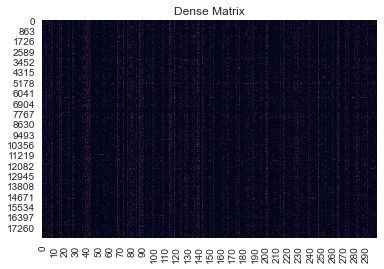

In [32]:
sns.heatmap(tfidf_vectors,vmin=0,vmax=1,cbar=False).set_title('Dense Matrix')
plt.show()

In [40]:
#Recommending top 5 similar books

def paper_recommend2(title):
   # finding cosine similarity for the vectors
    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    indices = pd.Series(dat.index, index = dat['title'])        
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    paper_indices = [i[0] for i in sim_scores]
    recomd2 = dat[['title']].iloc[paper_indices]
    print('\nHere are the top 5 similar articles that may interest you:')
    print('--------------------------\n')
    for n,i in enumerate(sim_scores):
        print('#{}.'.format(n+1), 'Title: “{}”.'.format(dat['title'][i[0]]),'(DOI:{})\n'.format(dat['doi'][i[0]]))
        

In [41]:
paper_recommend2('Budget Constraints in Prediction Markets')


Here are the top 5 similar articles that may interest you:
--------------------------

#1. Title: “Modeling the residential electricity consumption within a restructured
  power market”. (DOI:None)

#2. Title: “Phase Transition in the S&P Stock Market”. (DOI:10.1007/s11403-015-0160-x)

#3. Title: “Investigating the effect of competitiveness power in estimating the
  average weighted price in electricity market”. (DOI:10.1016/j.tej.2019.106628)

#4. Title: “Hierarchical structure of stock price fluctuations in financial markets”. (DOI:10.1088/1742-5468/2012/12/P12016)

#5. Title: “Satiation in Fisher Markets and Approximation of Nash Social Welfare”. (DOI:None)



In [38]:
#compare the outputs from paper_recommend(), and paper_recommend2()
paper_recommend1('Budget Constraints in Prediction Markets')


Here are the top 5 similar articles that may interest you:
--------------------------

#1. Title: “Can information be spread as a virus? Viral Marketing as epidemiological
  model”. (DOI:10.1002/mma.3783)

#2. Title: “Modeling the residential electricity consumption within a restructured
  power market”. (DOI:None)

#3. Title: “Investigating the effect of competitiveness power in estimating the
  average weighted price in electricity market”. (DOI:10.1016/j.tej.2019.106628)

#4. Title: “Markets, herding and response to external information”. (DOI:10.1371/journal.pone.0133287)

#5. Title: “Improving content marketing processes with the approaches by artificial
  intelligence”. (DOI:None)



# 6. Conclusions

With the exponentially increasing number of scholarly articles, extracting relevant information efficiently becomes a challenge. Recommendation systems provide a means to make the exploration of scholarly articles faster and more accurately, which would of great importance. 

This project explored the use of basic TF-IDF to build a recommendation engine that takes the title of an article that a user is reading, and returns top 5 related articles that may also interest the user. However, TF-IDF does not capture the semantic meaning, and creates a sparse, high-dimensional feature. Word embeddings create a dense, low-dimensional feature, and captures the semantic meaning quite well. Therefore, we explored the use of TF-IDF Word2Vec to build a similar recommendation engine. 

Both of the two content-based recommendation engines were able to recommend the top 5 related articles to the article that a user was reading. However, as no user-based data was currently available, we cannot evaluate the model performance quantitatively. Future improvements would include additional features such as authors, categories of articles, and user-based data.


# Acknowledgements
This work is only possible with the kaggle open-source database - arXiv. I would like to thank Dipanjan Sarkar, and the Springboard team who provided inputs and guidance throughout this project.